# Final Report for Capstone Project for Ryerson CKME136
#### Margaret Anderson Kilfoil

### Step 0: Prepare Enviroment

In [50]:
#Opening the requires packages
exec(open("../Scripts/Packages.py").read())
%matplotlib inline

#Set the Alpha value for the analysis
alpha_value = 0.01

#Set Target Variable
target = 'salary'

#Variables
PCAvar = 10

### Step 1: Data Collection

In [51]:
#Import the Data Files
exec(open("../Scripts/Data_Import.py").read())

### Step 2: Data Cleaning/Structuring

In [52]:
#Mapping together the files and calculating fields
exec(open("../Scripts/Data_Cleaning.py").read())

In [53]:
Analysis = Salary_Analysis.loc[:, ['lgID', 'salary']]
Analysis['salary'] = Analysis['salary']/1000000
Pivot = Analysis.pivot(columns='lgID', values='salary')

NameError: name 'Salary_Analysis' is not defined

In [ ]:
#Check the string variables
print(list(Data.select_dtypes(include=['O']).columns))

#Select what variables to dummy 
To_Dummy = ['teamID','lgID','birthCountry','bats','throws']
Data = Data.drop(['playerID','nameFirst', 'nameLast'], axis=1)
#Dummy the Variables
exec(open("../Scripts/Dummy_Strings.py").read())

### Step 3: Exploratory Data Analysis

In [ ]:
#lgID
testing = 'lgID'
independent = True

Test = Data[Data.filter(regex=testing).columns].multiply(Data[target], axis=0)

Test.head(20)

#exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

In [49]:
#Team ID
testing = 'teamID'
independent = True

Test = Data[Data.filter(regex=testing).columns].multiply(Data[target], axis=0)
#exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

teamID - ANA  teamID - ARI  teamID - ATL  teamID - BAL  teamID - BOS  \
0              0             0        870000             0             0   
1              0             0        550000             0             0   
2              0             0        545000             0             0   
3              0             0        633333             0             0   
4              0             0        625000             0             0   
5              0             0        800000             0             0   
6              0             0        150000             0             0   
7              0             0        483333             0             0   
8              0             0        772000             0             0   
9              0             0        250000             0             0   
10             0             0       1500000             0             0   
11             0             0       1500000             0             0   
12             0             0        455000             0             0   
13             0             0        407500             0             0   
14             0             0        275000             0             0   
15             0             0        775000             0             0   
16             0             0       1625000             0             0   
17             0             0        616667             0             0   
18             0             0        616667             0             0   
19             0             0        450000             0             0   

    teamID - CAL  teamID - CHA  teamID - CHN  teamID - CIN  teamID - CLE  \
0              0             0             0             0             0   
1              0             0             0             0             0   
2              0             0             0             0             0   
3              0             0             0             0             0   
4              0             0             0             0             0   
5              0             0             0             0             0   
6              0             0             0             0             0   
7              0             0             0             0             0   
8              0             0             0             0             0   
9              0             0             0             0             0   
10             0             0             0             0             0   
11             0             0             0             0             0   
12             0             0             0             0             0   
13             0             0             0             0             0   
14             0             0             0             0             0   
15             0             0             0             0             0   
16             0             0             0             0             0   
17             0             0             0             0             0   
18             0             0             0             0             0   
19             0             0             0             0             0   

        ...       teamID - PHI  teamID - PIT  teamID - SDN  teamID - SEA  \
0       ...                  0             0             0             0   
1       ...                  0             0             0             0   
2       ...                  0             0             0             0   
3       ...                  0             0             0             0   
4       ...                  0             0             0             0   
5       ...                  0             0             0             0   
6       ...                  0             0             0             0   
7       ...                  0             0             0             0   
8       ...                  0             0             0             0   
9       ...                  0             0      

In [38]:
#Throws
testing = 'throws'
independent = True

Test = Data[Data.filter(regex=testing).columns].multiply(Data[target], axis=0)

#exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: 11266.1255254
P-Value: 0.0
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 0.0
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 24281.2546815
P-Value: 0.0

Reject NULL hypothesis - Significant differences exist between groups.


### Step 4: Correlation Analysis

In [7]:
#Conduct Principal Component Analysis
exec(open("../Scripts/PCA.py").read())

             Rho         PValue
salary  1.000000   0.000000e+00
0       0.413051   0.000000e+00
8       0.193477  1.836456e-149
3       0.092029   9.735586e-35
4       0.085100   6.248066e-30
2       0.068363   7.244046e-20
9       0.038617   2.608280e-07
1       0.038583   2.671496e-07
7      -0.019516   9.273337e-03
6      -0.047625   2.121744e-10


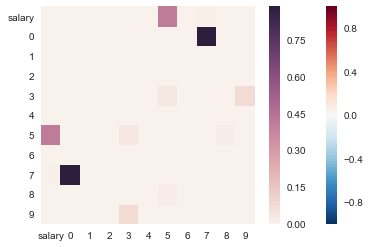

In [8]:
#Correlated the values, and strips out any variables that are below the Alpha value
exec(open("../Scripts/Correlation.py").read())

Axes(0.125,0.125;0.62x0.755)


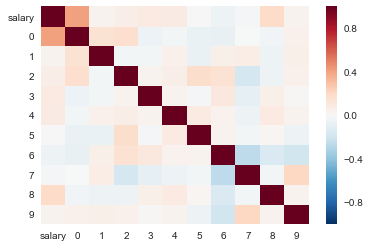

In [9]:
print(sns.heatmap(pd.DataFrame(Rho), xticklabels=list(Data), yticklabels=list(Data)))

Axes(0.125,0.125;0.62x0.755)


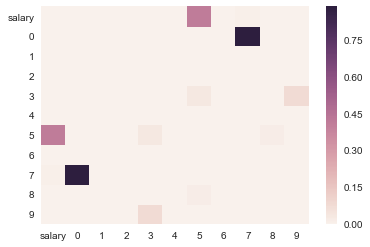

In [10]:
print(sns.heatmap(pd.DataFrame(Pval), xticklabels=list(Data), yticklabels=list(Data)))

### Step 5: Regression Analysis

In [11]:
#Spilt the Data into Training and Testing Sets (50% in each set)
exec(open("../Scripts/SplitToTrainTest.py").read())

#Create and apply linear regression model
exec(open("../Scripts/LinReg.py").read())

Explained Variance: -0.14
r^2: -0.33
Mean squared error: 2530063114047.74
